In [34]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

c:\Users\39327\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


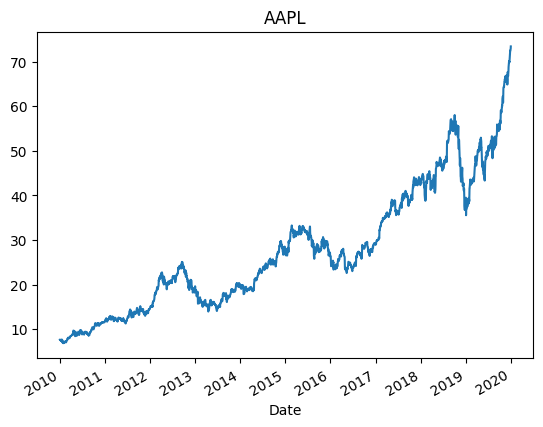

In [35]:
Apple = yf.download('AAPL', start='2010-01-01', end='2020-01-01')
Apple['Close'].plot(title='AAPL')
plt.show()

In [36]:
ticker= ["SPY", "AAPL", "KO"]
stocks = yf.download(ticker, start='2010-01-01', end='2020-01-01')

c:\Users\39327\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\39327\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\39327\AppData\Local\Programs\Python\Python312\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  3 of 3 completed


In [37]:
stocks.head()

Price      Adj Close                           Close                         \
Ticker          AAPL         KO        SPY      AAPL         KO         SPY   
Date                                                                          
2010-01-04  6.470742  18.498024  87.129967  7.643214  28.520000  113.330002   
2010-01-05  6.481928  18.274252  87.360558  7.656429  28.174999  113.629997   
2010-01-06  6.378825  18.267759  87.422096  7.534643  28.165001  113.709999   
2010-01-07  6.367032  18.222363  87.791130  7.520714  28.094999  114.190002   
2010-01-08  6.409362  17.885090  88.083282  7.570714  27.575001  114.570000   

Price           High                              Low                         \
Ticker          AAPL         KO         SPY      AAPL         KO         SPY   
Date                                                                           
2010-01-04  7.660714  28.610001  113.389999  7.585000  28.450001  111.510002   
2010-01-05  7.699643  28.495001  113.680000  7.616071  28.070000  112.849998   
2010-01-06  7.686786  28.219999  113.989998  7.526786  27.990000  113.430000   
2010-01-07  7.571429  28.184999  114.330002  7.466071  27.875000  113.180000   
2010-01-08  7.571429  27.820000  114.620003  7.466429  27.375000  113.660004   

Price           Open                            Volume                       
Ticker          AAPL         KO         SPY       AAPL        KO        SPY  
Date                                                                         
2010-01-04  7.622500  28.580000  112.370003  493729600  13870400  118944600  
2010-01-05  7.664286  28.424999  113.260002  601904800  23172400  111579900  
2010-01-06  7.656429  28.174999  113.519997  552160000  19264600  116074400  
2010-01-07  7.562500  28.165001  113.500000  477131200  13234600  131091100  
2010-01-08  7.510714  27.730000  113.889999  447610800  28712400  126402800

In [38]:
close= stocks['Close']
close

Ticker,AAPL,KO,SPY
Date,,,
2010-01-04,7.643214,28.520000,113.330002
2010-01-05,7.656429,28.174999,113.629997
2010-01-06,7.534643,28.165001,113.709999
2010-01-07,7.520714,28.094999,114.190002
2010-01-08,7.570714,27.575001,114.570000
...,...,...,...
2019-12-24,71.067497,54.709999,321.230011
2019-12-26,72.477501,55.020000,322.940002
2019-12-27,72.449997,55.349998,322.859985


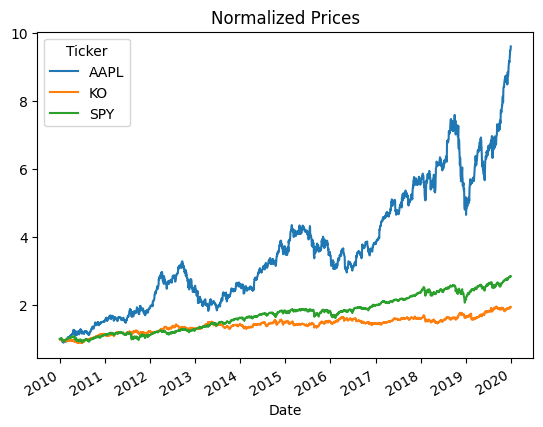

In [39]:
close_normalized = close / close.iloc[0]
close_normalized.plot(title='Normalized Prices')
plt.show()



In [40]:
returns = close.pct_change()
returns.head()


Ticker,AAPL,KO,SPY
Date,,,
2010-01-04,NaN,NaN,NaN
2010-01-05,0.001729,-0.012097,0.002647
2010-01-06,-0.015906,-0.000355,0.000704
2010-01-07,-0.001849,-0.002485,0.004221
2010-01-08,0.006648,-0.018509,0.003328


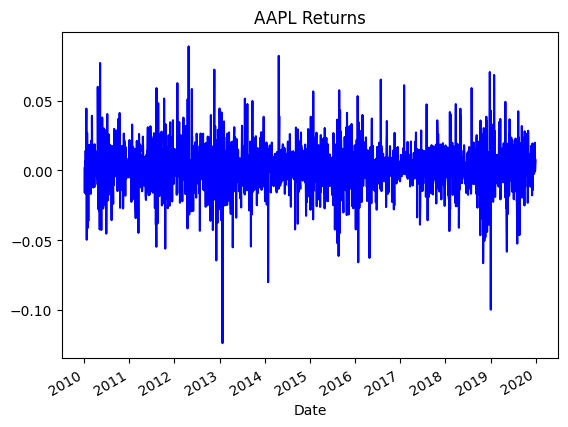

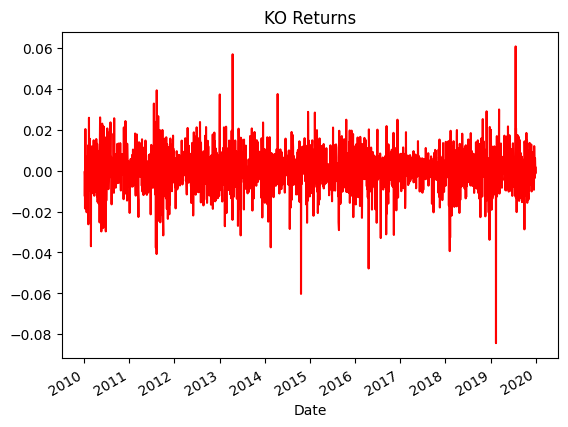

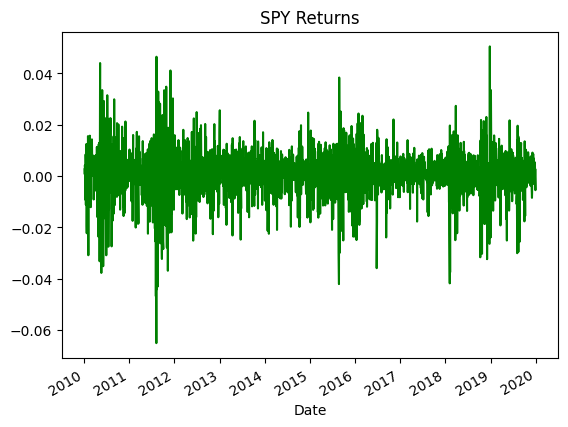

In [41]:
returns['AAPL'].plot(title='AAPL Returns', color='blue')
plt.show()

returns['KO'].plot(title='KO Returns', color='red')
plt.show()

returns['SPY'].plot(title='SPY Returns', color='green')
plt.show()


In [42]:
returns_corr = returns.corr()
returns_corr

Ticker,AAPL,KO,SPY
Ticker,,,
AAPL,1.000000,0.254430,0.594376
KO,0.254430,1.000000,0.553914
SPY,0.594376,0.553914,1.000000


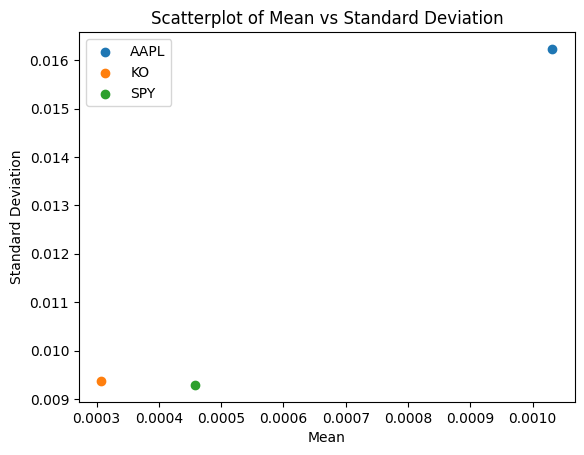

In [43]:
mean_values = returns.mean(axis=0)
std_values = returns.std(axis=0)
# Scatterplot for AAPL
plt.scatter(mean_values['AAPL'], std_values['AAPL'], label='AAPL')
# Scatterplot for KO
plt.scatter(mean_values['KO'], std_values['KO'], label='KO')
# Scatterplot for SPY
plt.scatter(mean_values['SPY'], std_values['SPY'], label='SPY')

# Set labels and title
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.title('Scatterplot of Mean vs Standard Deviation')

# Add legend
plt.legend()

# Show the plot
plt.show()


In [44]:
from sklearn.model_selection import train_test_split

# Divide returns dataset into train and test sets
returns_train, returns_test = train_test_split(returns, test_size=0.2, random_state=42)

# Divide close dataset into train and test sets
close_train, close_test = train_test_split(close, test_size=0.2, random_state=42)


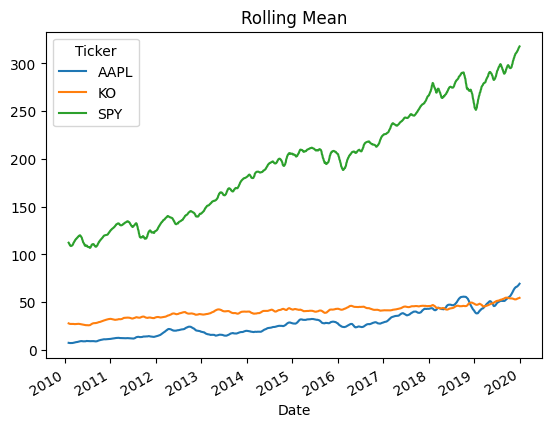

In [48]:
close_roll=close.rolling(window=20).mean()
close_roll.plot(title='Rolling Mean')
plt.show()

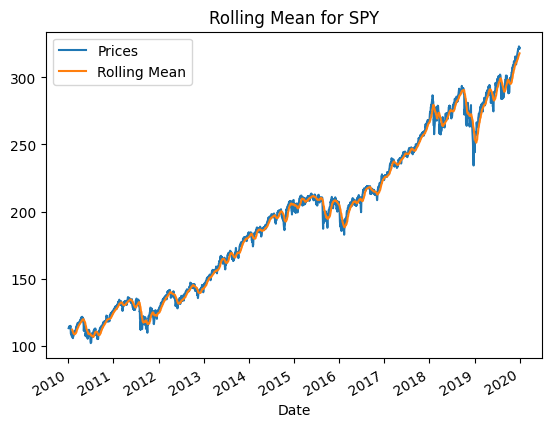

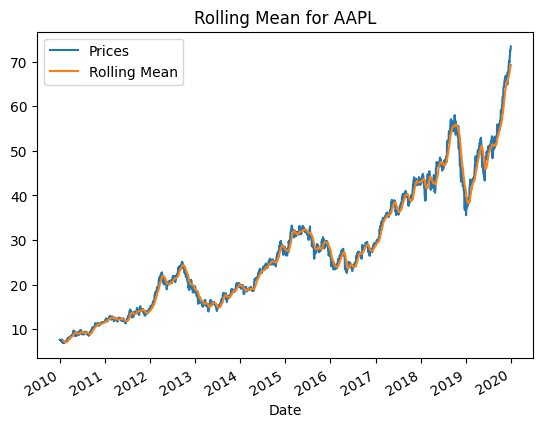

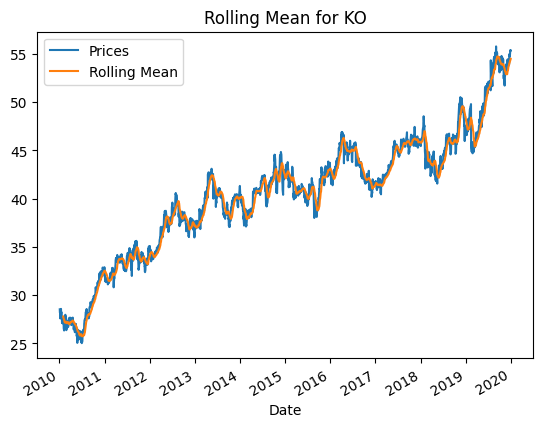

In [52]:
# Plotting the prices and rolling means for each ticker
for ticker in ticker:
    close[ticker].plot(title=f'Prices for {ticker}')
    close_roll[ticker].plot(title=f'Rolling Mean for {ticker}')
    plt.legend(['Prices', 'Rolling Mean'])
    plt.show()
 

### Cumulative Returns, Drawdowns etc...

In [55]:
Apple["d_returns"] = Apple["Close"].pct_change()
Apple["d_returns"]

Date
2010-01-04         NaN
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
                ...   
2019-12-24    0.000951
2019-12-26    0.019840
2019-12-27   -0.000379
2019-12-30    0.005935
2019-12-31    0.007307
Name: d_returns, Length: 2516, dtype: float64

In [57]:
Apple.dropna(inplace=True)
Apple.head()    

,Open,High,Low,Close,Adj Close,Volume,d_returns
Date,,,,,,,
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.481928,601904800,0.001729
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.378825,552160000,-0.015906
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.367032,477131200,-0.001849
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.409362,447610800,0.006648
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.352821,462229600,-0.008821


In [60]:
Apple_returns = Apple["d_returns"]
Apple_returns.sum()

2.595142989091748

In [61]:
np.exp(Apple_returns.sum())

13.398503064226215